In [1]:
import cv2
import numpy 
import copy
from scipy.spatial import distance
import random
import matplotlib.pyplot as plt

In [2]:
def check_game(centre_squares):
    img = cv2.imread('Dots_Lines.jpg')
    flag = True
    for i in centre_squares:
        p,q = i
        
        if sum(img[p][q]) == 720:
            flag = True
            break
        else:
            flag = False
    return flag

In [3]:
def choose_first():
    return random.choice(['blue','red'])

In [4]:
class Player:
    
    def __init__(self, colour, score = 0,turn = None):
        self.colour = colour
        self.score = score
        self.turn = turn

In [5]:
def Square(Board,Boxes):
    
    if all(Board[i] != ' ' for i in [0,3,4,7]) and 0 in Boxes:
        Boxes.remove(0)
        return True,Boxes
    elif all(Board[i] != ' ' for i in [1,4,5,8]) and 1 in Boxes:
        Boxes.remove(1)
        return True,Boxes
    elif all(Board[i] != ' ' for i in [2,5,6,9]) and 2 in Boxes:
        Boxes.remove(2)
        return True,Boxes
    elif all(Board[i] != ' ' for i in [7,10,11,14]) and 3 in Boxes:
        Boxes.remove(3)
        return True,Boxes
    elif all(Board[i] != ' ' for i in [8,11,12,15]) and 4 in Boxes:
        Boxes.remove(4)
        return True,Boxes
    elif all(Board[i] != ' ' for i in [9,12,13,16]) and 5 in Boxes:
        Boxes.remove(5)
        return True,Boxes
    elif all(Board[i] != ' ' for i in [14,17,18,21]) and 6 in Boxes:
        Boxes.remove(6)
        return True,Boxes
    elif all(Board[i] != ' ' for i in [15,18,19,22]) and 7 in Boxes:
        Boxes.remove(7)
        return True,Boxes
    elif all(Board[i] != ' ' for i in [16,19,20,23]) and 8 in Boxes:
        Boxes.remove(8)
        return True,Boxes
    else:
        return False,Boxes

In [6]:
def Game_Complete(Board):
    if all(Board[i] != ' ' for i in range(12)):
        return True
    else:
        return False

In [7]:
def ID(board):
    return '.'.join(str(val) for val in board)

In [8]:
def updateQ(Q, IDlist, Actionlist, Reward, alpha, gamma):
    
    IDlist.reverse()
    Actionlist.reverse()
    for i,ID in enumerate(IDlist):
        if i == 0:
            if ID not in Q:
                Q.update({ID:[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]})
            Q[ID][Board_dictionary(str(Actionlist[i]))] = Reward
        else:
            if ID not in Q:
                Q.update({ID:[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]})
            prev_reward = Q[ID][Board_dictionary(str(Actionlist[i]))]
            Q[ID][Board_dictionary(str(Actionlist[i]))] = (1-alpha)*prev_reward + alpha*(Reward + gamma*max(Q[IDlist[i-1]]))
    
    return Q

In [9]:
def BestMove(Q,ID):
    
    return Q[ID].index(max(Q[ID]))

In [10]:
def Board_dictionary(string):
    Board_Dictioanry = {'[(175, 175), (225, 175)]': 0,
                  '[(225, 175), (275, 175)]': 1,
                  '[(275, 175), (325, 175)]': 2,
                  '[(175, 175), (175, 225)]': 3,
                  '[(225, 175), (225, 225)]': 4,
                  '[(275, 175), (275, 225)]': 5,
                  '[(325, 175), (325, 225)]': 6,
                  '[(175, 225), (225, 225)]': 7,
                  '[(225, 225), (275, 225)]': 8,
                  '[(275, 225), (325, 225)]': 9,
                  '[(175, 225), (175, 275)]': 10,
                  '[(225, 225), (225, 275)]': 11,
                  '[(275, 225), (275, 275)]': 12,
                  '[(325, 225), (325, 275)]': 13,
                   '[(175, 275), (225, 275)]': 14,
                   '[(225, 275), (275, 275)]': 15,
                   '[(275, 275), (325, 275)]': 16,
                   '[(175, 275), (175, 325)]': 17,
                   '[(225, 275), (225, 325)]': 18,
                   '[(275, 275), (275, 325)]': 19,
                   '[(325, 275), (325, 325)]': 20,
                   '[(175, 325), (225, 325)]': 21,
                   '[(225, 325), (275, 325)]': 22,
                   '[(275, 325), (325, 325)]': 23}
    return Board_Dictioanry[string]

In [11]:
def Train(no_ofEpisodes, alpha, gamma, expFac, player):
    
    Q1 = {}
    Q2 = {}
    
    Actions = [[(175, 175), (225, 175)],[(225, 175), (275, 175)],[(275, 175), (325, 175)],
                        [(175, 175), (175, 225)],[(225, 175), (225, 225)],[(275, 175), (275, 225)],[(325, 175), (325, 225)],
                        [(175, 225), (225, 225)],[(225, 225), (275, 225)],[(275, 225), (325, 225)],
                        [(175, 225), (175, 275)],[(225, 225), (225, 275)],[(275, 225), (275, 275)],[(325, 225), (325, 275)],
                        [(175, 275), (225, 275)],[(225, 275), (275, 275)],[(275, 275), (325, 275)],
                        [(175, 275), (175, 325)],[(225, 275), (225, 325)],[(275, 275), (275, 325)],[(325, 275), (325, 325)],
                        [(175, 325), (225, 325)],[(225, 325), (275, 325)],[(275, 325), (325, 325)]]
    
    if player == 'blue':
        expRat1 = 0.5
        expRat2 = 1.0
    elif player == 'red':
        expRat1 = 1.0
        expRat2 = 0.5
        
    win = 0
    lose = 0
    tie = 0
    invalid = 0
    flag = 0
    flag2 = 0
        
    P1 = Player('blue')
    P2 = Player('red')

    for i in range(no_ofEpisodes):
        flag2 = 0
        Boxes = [0,1,2,3,4,5,6,7,8]
        Board = [' ']*24
        Valid_Actions = [[(175, 175), (225, 175)],[(225, 175), (275, 175)],[(275, 175), (325, 175)],
                        [(175, 175), (175, 225)],[(225, 175), (225, 225)],[(275, 175), (275, 225)],[(325, 175), (325, 225)],
                        [(175, 225), (225, 225)],[(225, 225), (275, 225)],[(275, 225), (325, 225)],
                        [(175, 225), (175, 275)],[(225, 225), (225, 275)],[(275, 225), (275, 275)],[(325, 225), (325, 275)],
                        [(175, 275), (225, 275)],[(225, 275), (275, 275)],[(275, 275), (325, 275)],
                        [(175, 275), (175, 325)],[(225, 275), (225, 325)],[(275, 275), (275, 325)],[(325, 275), (325, 325)],
                        [(175, 325), (225, 325)],[(225, 325), (275, 325)],[(275, 325), (325, 325)]]

        first_player = choose_first()
        if P1.colour == first_player:
            P1.turn = True
            P2.turn = False
        else:
            P1.turn = False
            P2.turn = True

        P1IDlist = []
        P1Actionlist = []
        P2IDlist = []
        P2Actionlist = []

        while not Game_Complete(Board):
            
            if P1.turn == True and len(Valid_Actions) != 0:
                stateID = ID(Board)
                P1IDlist.append(stateID)
                if random.random() < expRat1 or stateID not in Q1.keys():
                    line = random.choice(Valid_Actions)
                else:
                    line = Actions[BestMove(Q1,stateID)]
                    
                Board[Board_dictionary(str(line))] = P1.colour
                P1Actionlist.append(line)
                
                if line not in Valid_Actions:
                    invalid += 1
                    Q1 = updateQ(Q1, P1IDlist, P1Actionlist, 0, alpha, gamma)
                    flag2 = 1
                    break
                Valid_Actions.remove(line)

                F,Boxes = Square(Board,Boxes)
                if F:
                    P1.score += 1
                    Q1 = updateQ(Q1, P1IDlist, P1Actionlist, 1, alpha, gamma)
                    Q2 = updateQ(Q2, P2IDlist, P2Actionlist, -1, alpha, gamma)
                    P1.turn = True
                    P2.turn = False
                    F,Boxes = Square(Board,Boxes)
                    if F:
                        P1.score += 1
                        Q1 = updateQ(Q1, P1IDlist, P1Actionlist, 1, alpha, gamma)
                        Q2 = updateQ(Q2, P2IDlist, P2Actionlist, -1, alpha, gamma)
                        P1.turn = True
                        P2.turn = False

                P1.turn = False
                P2.turn = True

            elif P2.turn == True and len(Valid_Actions) != 0:
                stateID = ID(Board)
                P2IDlist.append(ID(Board))
                if random.random() < expRat2 or stateID not in Q2.keys():
                    line = random.choice(Valid_Actions)
                else:
                    line = Actions[BestMove(Q2,stateID)]

                Board[Board_dictionary(str(line))] = P2.colour

                P2Actionlist.append(line)
                if line not in Valid_Actions:
                    invalid += 1
                    #print("............")
                    Q2 = updateQ(Q2, P2IDlist, P2Actionlist, 0, alpha, gamma)
                    flag2 = 1
                    break
                Valid_Actions.remove(line)

                F,Boxes = Square(Board,Boxes)
                if F:
                    P2.score += 1
                    Q1 = updateQ(Q1, P1IDlist, P1Actionlist, -1, alpha, gamma)
                    Q2 = updateQ(Q2, P2IDlist, P2Actionlist, 1, alpha, gamma)
                    P1.turn = False
                    P2.turn = True
                    F,Boxes = Square(Board,Boxes)
                    if F:
                        P2.score += 1
                        Q1 = updateQ(Q1, P1IDlist, P1Actionlist, -1, alpha, gamma)
                        Q2 = updateQ(Q2, P2IDlist, P2Actionlist, 1, alpha, gamma)
                        P1.turn = False
                        P2.turn = True

                P1.turn = True
                P2.turn = False

        if(flag2 == 1):
            continue
    
        if P1.score > P2.score:
            Q1 = updateQ(Q1, P1IDlist, P1Actionlist, 5, alpha, gamma)
            Q2 = updateQ(Q2, P2IDlist, P2Actionlist, -5, alpha, gamma)
            if P1.colour == player:
                win+=1
                plt.subplot(2,2,1)
                plt.plot(i,win,'xg')
            else:
                lose+=1
                plt.subplot(2,2,2)
                plt.plot(i,lose,'xr')
            
            
        elif P2.score > P1.score:
            Q1 = updateQ(Q1, P1IDlist, P1Actionlist, -5, alpha, gamma)
            Q2 = updateQ(Q2, P2IDlist, P2Actionlist, 5, alpha, gamma)
            if P2.colour == player:
                win+=1
                plt.subplot(2,2,1)
                plt.plot(i,win,'xg')
            else:
                lose+=1
                plt.subplot(2,2,2)
                plt.plot(i,lose,'xr')
            
        elif P1.score == P2.score:
            Q1 = updateQ(Q1, P1IDlist, P1Actionlist, 0, alpha, gamma)
            Q2 = updateQ(Q2, P2IDlist, P2Actionlist, 0, alpha, gamma)
            tie+=1
            plt.subplot(2,2,3)
            plt.plot(i,tie,'xb')
            
        if player == 'blue':
            if expRat1 > 0.01:
                expRat1 *= expFac
        elif player == 'red':
            if expRat2 > 0.01:
                expRat2 *= expFac

    print('win',win)
    print('lose',lose)
    print('tie',tie)
    print('invalid',invalid)
    return Q1,Q2

win 3119
lose 1164
tie 14
invalid 5703


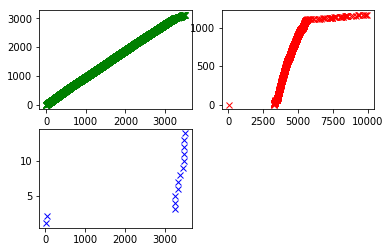

In [14]:
Q1,_ = Train(no_ofEpisodes=10000, alpha=0.08, gamma=0.3, expFac=0.6,player = 'blue')
plt.show()

In [15]:
def Q_RandomPlayer(no_ofGames,Q):
    
    Actions = [[(175, 175), (225, 175)],[(225, 175), (275, 175)],[(275, 175), (325, 175)],
                        [(175, 175), (175, 225)],[(225, 175), (225, 225)],[(275, 175), (275, 225)],[(325, 175), (325, 225)],
                        [(175, 225), (225, 225)],[(225, 225), (275, 225)],[(275, 225), (325, 225)],
                        [(175, 225), (175, 275)],[(225, 225), (225, 275)],[(275, 225), (275, 275)],[(325, 225), (325, 275)],
                        [(175, 275), (225, 275)],[(225, 275), (275, 275)],[(275, 275), (325, 275)],
                        [(175, 275), (175, 325)],[(225, 275), (225, 325)],[(275, 275), (275, 325)],[(325, 275), (325, 325)],
                        [(175, 325), (225, 325)],[(225, 325), (275, 325)],[(275, 325), (325, 325)]]
    
    win = 0
    lose = 0
    tie = 0
    nottrained = 0
    
    for i in range(no_ofGames):
        Board = [' ']*24
        Boxes = [0,1,2,3,4,5,6,7,8]
        Valid_Actions = [[(175, 175), (225, 175)],[(225, 175), (275, 175)],[(275, 175), (325, 175)],
                        [(175, 175), (175, 225)],[(225, 175), (225, 225)],[(275, 175), (275, 225)],[(325, 175), (325, 225)],
                        [(175, 225), (225, 225)],[(225, 225), (275, 225)],[(275, 225), (325, 225)],
                        [(175, 225), (175, 275)],[(225, 225), (225, 275)],[(275, 225), (275, 275)],[(325, 225), (325, 275)],
                        [(175, 275), (225, 275)],[(225, 275), (275, 275)],[(275, 275), (325, 275)],
                        [(175, 275), (175, 325)],[(225, 275), (225, 325)],[(275, 275), (275, 325)],[(325, 275), (325, 325)],
                        [(175, 325), (225, 325)],[(225, 325), (275, 325)],[(275, 325), (325, 325)]]

        P1 = Player('blue')
        P2 = Player('random')

        first_player = choose_first()
        if P1.colour == first_player:
            P1.turn = True
            P2.turn = False
        else:
            P1.turn = False
            P2.turn = True

        while not Game_Complete(Board):

            if P1.turn == True and len(Valid_Actions) != 0:
                stateID = ID(Board)
                if stateID not in Q.keys():
                    line = random.choice(Valid_Actions)
                    nottrained += 1
                else:
                    line = Actions[BestMove(Q,stateID)]

                Board[Board_dictionary(str(line))] = P1.colour
                Valid_Actions.remove(line)

                F,Boxes = Square(Board,Boxes)
                if F:
                    P1.score += 1
                    P1.turn = True
                    P2.turn = False
                    F,Boxes = Square(Board,Boxes)
                    if F:
                        P1.score += 1
                        P1.turn = True
                        P2.turn = False

                P1.turn = False
                P2.turn = True

            elif P2.turn == True and len(Valid_Actions) != 0:

                line = random.choice(Valid_Actions)

                Board[Board_dictionary(str(line))] = P2.colour
                Valid_Actions.remove(line)

                F,Boxes = Square(Board,Boxes)
                if F:
                    P2.score += 1
                    P1.turn = False
                    P2.turn = True
                    F,Boxes = Square(Board,Boxes)
                    if F:
                        P2.score += 1
                        P1.turn = False
                        P2.turn = True

                P1.turn = True
                P2.turn = False

#         if(flag2 == 1):
#             continue
    
        if P1.score > P2.score:
            win+=1

        elif P2.score > P1.score:
            lose+=1

        elif P1.score == P2.score:
            tie+=1


    print('win',win)
    print('lose',lose)
    print('tie',tie)
    print('not trained',nottrained)

In [16]:
def Board2Int(Board):
    Y = 0
    X = Board.split('.')
    for i in range(len(X)):
        if X[i] == 'blue':
            Y += 1
        elif X[i] == 'red':
            Y += (3**i)
        elif X[i] == ' ':
            Y += (3**i)*2
    return Y + 1

In [17]:
def Train_NN(Q):
    w_vector=numpy.zeros((531441,26))

    error_threshold = 0.2

    before=current=after=None
    count = 1000
    while count > 0:


        for j in Q.keys():

            q = Board2Int(j)

            for i in range(1,25):


                a = i-1
                b = i
                c = i+1
                before = w_vector[q][a]
                current = w_vector[q][b]
                after = w_vector[q][c]
                y_sum = (before+current+after)
                #print('y_sum=',y_sum)

                y_error = Q[j][i-1] - y_sum

                y_error_corrected=(y_error/3)

                w_vector[q][a]=(y_error_corrected)+(w_vector[q][a])
                w_vector[q][b]=(y_error_corrected)+(w_vector[q][b])
                w_vector[q][c]=(y_error_corrected)+(w_vector[q][c])

        error_threshold = y_error
        count = count - 1
        print(count)
    return w_vector

In [18]:
def NN_RandomPlayer(no_ofGames,NN):
    
    Actions = [[(175, 175), (225, 175)],[(225, 175), (275, 175)],[(275, 175), (325, 175)],
                        [(175, 175), (175, 225)],[(225, 175), (225, 225)],[(275, 175), (275, 225)],[(325, 175), (325, 225)],
                        [(175, 225), (225, 225)],[(225, 225), (275, 225)],[(275, 225), (325, 225)],
                        [(175, 225), (175, 275)],[(225, 225), (225, 275)],[(275, 225), (275, 275)],[(325, 225), (325, 275)],
                        [(175, 275), (225, 275)],[(225, 275), (275, 275)],[(275, 275), (325, 275)],
                        [(175, 275), (175, 325)],[(225, 275), (225, 325)],[(275, 275), (275, 325)],[(325, 275), (325, 325)],
                        [(175, 325), (225, 325)],[(225, 325), (275, 325)],[(275, 325), (325, 325)]]
    
    win = 0
    lose = 0
    tie = 0
    nottrained = 0
    
    for i in range(no_ofGames):
        Board = [' ']*24
        Boxes = [0,1,2,3,4,5,6,7,8]
        Valid_Actions = [[(175, 175), (225, 175)],[(225, 175), (275, 175)],[(275, 175), (325, 175)],
                        [(175, 175), (175, 225)],[(225, 175), (225, 225)],[(275, 175), (275, 225)],[(325, 175), (325, 225)],
                        [(175, 225), (225, 225)],[(225, 225), (275, 225)],[(275, 225), (325, 225)],
                        [(175, 225), (175, 275)],[(225, 225), (225, 275)],[(275, 225), (275, 275)],[(325, 225), (325, 275)],
                        [(175, 275), (225, 275)],[(225, 275), (275, 275)],[(275, 275), (325, 275)],
                        [(175, 275), (175, 325)],[(225, 275), (225, 325)],[(275, 275), (275, 325)],[(325, 275), (325, 325)],
                        [(175, 325), (225, 325)],[(225, 325), (275, 325)],[(275, 325), (325, 325)]]

        P1 = Player('blue')
        P2 = Player('random')

        first_player = choose_first()
        if P1.colour == first_player:
            P1.turn = True
            P2.turn = False
        else:
            P1.turn = False
            P2.turn = True

        while not Game_Complete(Board):

            if P1.turn == True and len(Valid_Actions) != 0:
                stateID = ID(Board)
                if Board2Int(stateID) not in NN[:][0]:
                    line = random.choice(Valid_Actions)
                    nottrained += 1
                else:
                    x,y = numpy.where(Board2Int(stateID))
                    p,q = numpy.where(w = numpy.max(NN[int(x)][1:]))
                    line = Actions[int(q)-1]

                Board[Board_dictionary(str(line))] = P1.colour
                Valid_Actions.remove(line)

                F,Boxes = Square(Board,Boxes)
                if F:
                    P1.score += 1
                    P1.turn = True
                    P2.turn = False
                    
                    F,Boxes = Square(Board,Boxes)
                    if F:
                        P1.score += 1
                        P1.turn = True
                        P2.turn = False

                P1.turn = False
                P2.turn = True

            elif P2.turn == True and len(Valid_Actions) != 0:

                line = random.choice(Valid_Actions)

                Board[Board_dictionary(str(line))] = P2.colour
                Valid_Actions.remove(line)

                F,Boxes = Square(Board,Boxes)
                if F:
                    P2.score += 1
                    P1.turn = False
                    P2.turn = True
                    
                    F,Boxes = Square(Board,Boxes)
                    if F:
                        P2.score += 1
                        P1.turn = False
                        P2.turn = True

                P1.turn = True
                P2.turn = False

        if P1.score > P2.score:
            win+=1

        elif P2.score > P1.score:
            lose+=1

        elif P1.score == P2.score:
            tie+=1


    print('win',win)
    print('lose',lose)
    print('tie',tie)
    print('not trained',nottrained)

In [21]:
Q_RandomPlayer(10000,Q1)

win 4495
lose 4579
tie 926
not trained 110209


In [32]:
NN = Train_NN(Q1)

IndexError: index 166887813020 is out of bounds for axis 0 with size 1051

In [29]:
NN_RandomPlayer(100,NN)

NameError: name 'NN' is not defined